In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import ecco_v4_py as ecco
#from dask.distributed import Client
from glob import glob

import os
import warnings

In [2]:
warnings.simplefilter('ignore')
os.environ['PYTHONWARNOINGS'] = 'ignore'

picking up NetCDF formatted monthly data

In [3]:
dataDir = '/scratch2/shared/ecco/v4r4'

In [4]:
%%time
dsm = xr.open_mfdataset(dataDir+'/nctiles_monthly/THETA/*/*.nc')

CPU times: user 11.7 s, sys: 2.24 s, total: 14 s
Wall time: 14.4 s


In [5]:
%%time
ds = xr.open_mfdataset(dataDir+'/nctiles_daily/THETA/2004/*/*.nc')

CPU times: user 14.3 s, sys: 1.88 s, total: 16.2 s
Wall time: 16.7 s


In [6]:
display( ds, dsm )

<xarray.Dataset>
Dimensions:    (k: 50, j: 90, i: 90, tile: 13, time: 366, nv: 2)
Coordinates:
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 2004-01-01T12:00:00 ... 2004-12-31T12:00:00
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/26)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 3 Extension (ECCOv4r...
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nx:                           90
    ny:                           90
    geospatial_lon_max:           179.98691
    geospatial_lon_min:           -179.98895
    time_coverage_start:          2004-01-01T00:00:00
    time_coverage_end:            2004-01-02T00:00:00

<xarray.Dataset>
Dimensions:    (k: 50, j: 90, i: 90, tile: 13, time: 312, nv: 2)
Coordinates:
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    time_bnds  (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/26)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 3 Extension (ECCOv4r...
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nx:                           90
    ny:                           90
    geospatial_lon_max:           179.98691
    geospatial_lon_min:           -179.98895
    time_coverage_start:          1992-01-01T00:00:00
    time_coverage_end:            1992-02-01T00:00:00

Load GRID file

In [7]:
dgrid = xr.open_dataset(dataDir+'/nctiles_grid/ECCO-GRID.nc')

In [8]:
dgrid.load()
dsm = dsm.merge(dgrid)
dsm

<xarray.Dataset>
Dimensions:    (k: 50, j: 90, i: 90, tile: 13, time: 312, nv: 2, k_p1: 51,
                j_g: 90, i_g: 90, k_u: 50, k_l: 50)
Coordinates: (12/41)
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC         (tile, j, i) float32 -111.6 -111.3 -110.9 ... -105.6 -111.9
    YC         (tile, j, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
    ...         ...
    hFacS      (k, tile, j_g, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hFacC      (k, tile, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    hFacW      (k, tile, j, i_g) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    maskW      (k, tile, j, i_g) bool False False False ... False False False
    maskC      (k, tile, j, i) bool False False False ... False False False
    maskS      (k, tile, j_g, i) bool False False False ... False False False
Dimensions without coordinates: nv
Data variables:
    THETA      (time, k, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/26)
    product_time_coverage_start:  1992-01-01T12:00:00
    author:                       Ou Wang and Ian Fenty
    Insitution:                   JPL
    product_version:              ECCO Version 4 Release 3 Extension (ECCOv4r...
    time_units:                   days since 1992-01-01 00:00:00
    Conventions:                  CF-1.6
    ...                           ...
    nx:                           90
    ny:                           90
    geospatial_lon_max:           179.98691
    geospatial_lon_min:           -179.98895
    time_coverage_start:          1992-01-01T00:00:00
    time_coverage_end:            1992-02-01T00:00:00

Checking I loaded correctly by plotting surface tempertaure, SST. LLC grid proving to be a headache...

<xarray.DataArray 'THETA' (tile: 13, j: 90, i: 90)>
dask.array<mean_agg-aggregate, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates: (12/15)
    k        int64 0
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) float32 -111.6 -111.3 -110.9 ... -99.42 -105.6 -111.9
    YC       (tile, j, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
    ...       ...
    Depth    (tile, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    rA       (tile, j, i) float32 3.623e+08 3.633e+08 ... 3.685e+08 3.611e+08
    PHrefC   float32 49.05
    drF      float32 10.0
    hFacC    (tile, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    maskC    (tile, j, i) bool False False False False ... False False False

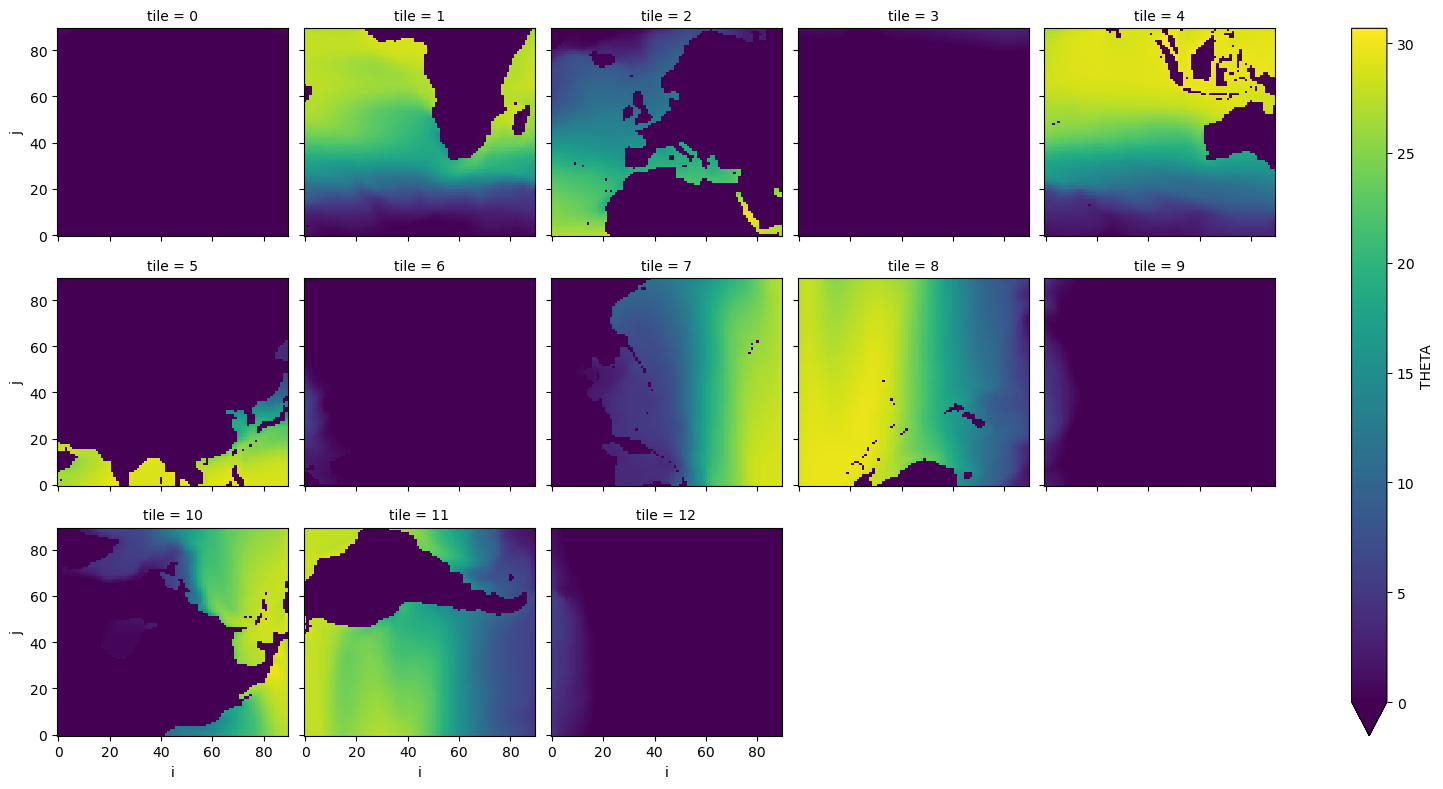

In [9]:
sst = dsm.THETA.isel(k=0).mean('time')
display(sst)
sst.plot(col='tile',col_wrap=5,figsize=(16,8), vmin=0)

## Show rotated indices

Tile 2 is *NOT* rotated, Tile 10 *IS* rotated. This means that the index **i** corresponds to change in *longitude* in Tile 2 and change in *latitude* in Tile 10. 

In [10]:
def plot_GRIDC(ds, subplot, tile, i=999, j=999):
    plt.subplot(subplot)
    
    if i<999 and j==999:
        plt.plot( ds.YC.sel(tile=tile, i=i), label='lat')
        plt.plot( ds.XC.sel(tile=tile, i=i), label='lon' )
    elif j<999 and i==999:
        plt.plot( ds.YC.sel(tile=tile, j=j), label='lat')
        plt.plot( ds.XC.sel(tile=tile, j=j), label='lon' )
    
    return None

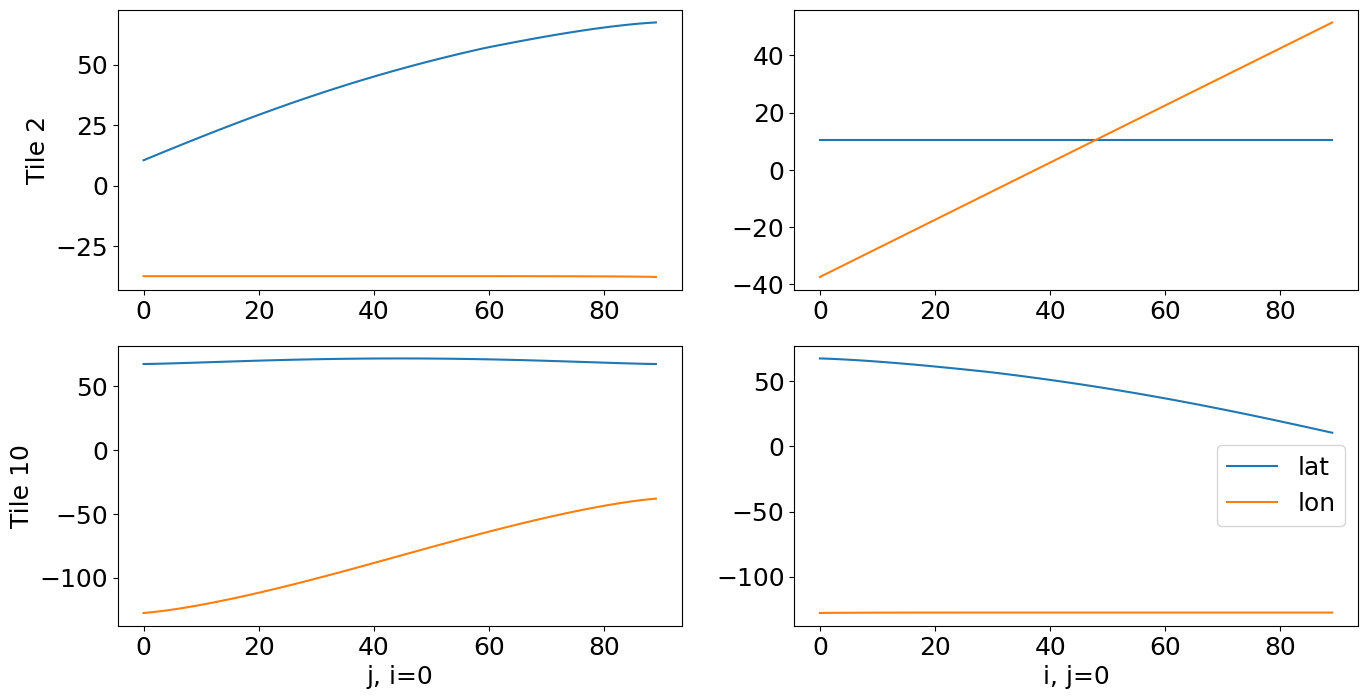

In [11]:
plt.rcParams.update({'figure.figsize':(15,7),'font.size':18})
plt.figure(figsize=(16,8))

plot_GRIDC(dsm, 221, 2, i=0)
plt.ylabel('Tile 2')

plot_GRIDC(dsm, 223, 10, i=0)
plt.xlabel('j, i=0')
plt.ylabel('Tile 10')

plot_GRIDC(dsm, 222, 2, j=0)

plot_GRIDC(dsm, 224, 10, j=0)
plt.xlabel('i, j=0')
plt.legend()

plt.show()

## Some standard looking plots

Plot on lat lon projection, easy thanks to ECCO-v4_py. Robinson and Orthographic projections. 

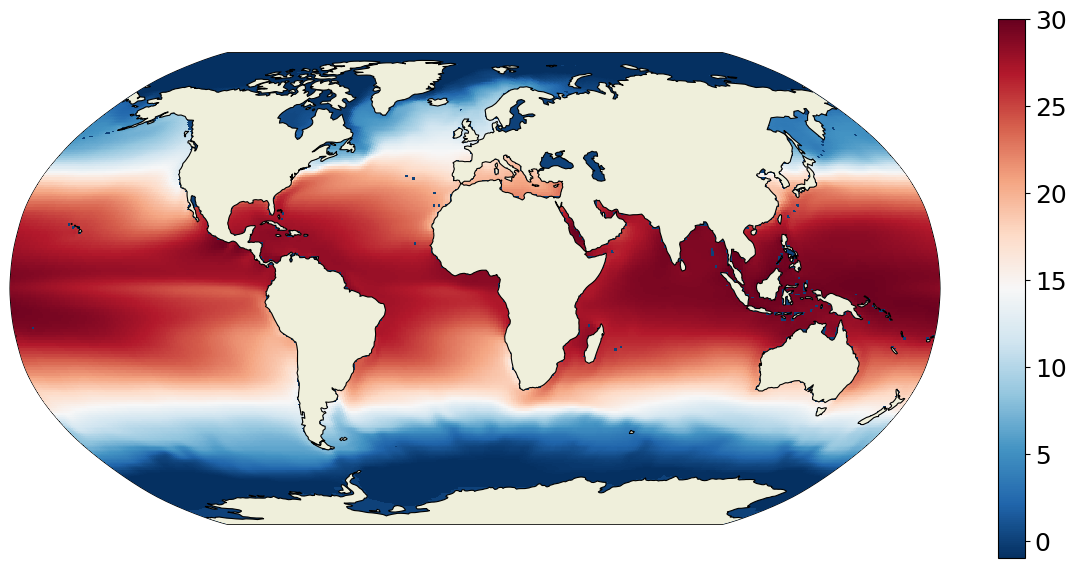

In [12]:
ecco.plot_proj_to_latlon_grid(dsm.XC,dsm.YC,sst,
                              show_colorbar=True,
                              cmin=-1, cmax=30 );
#plt.savefig('../img/eccov4r4-SST.png')

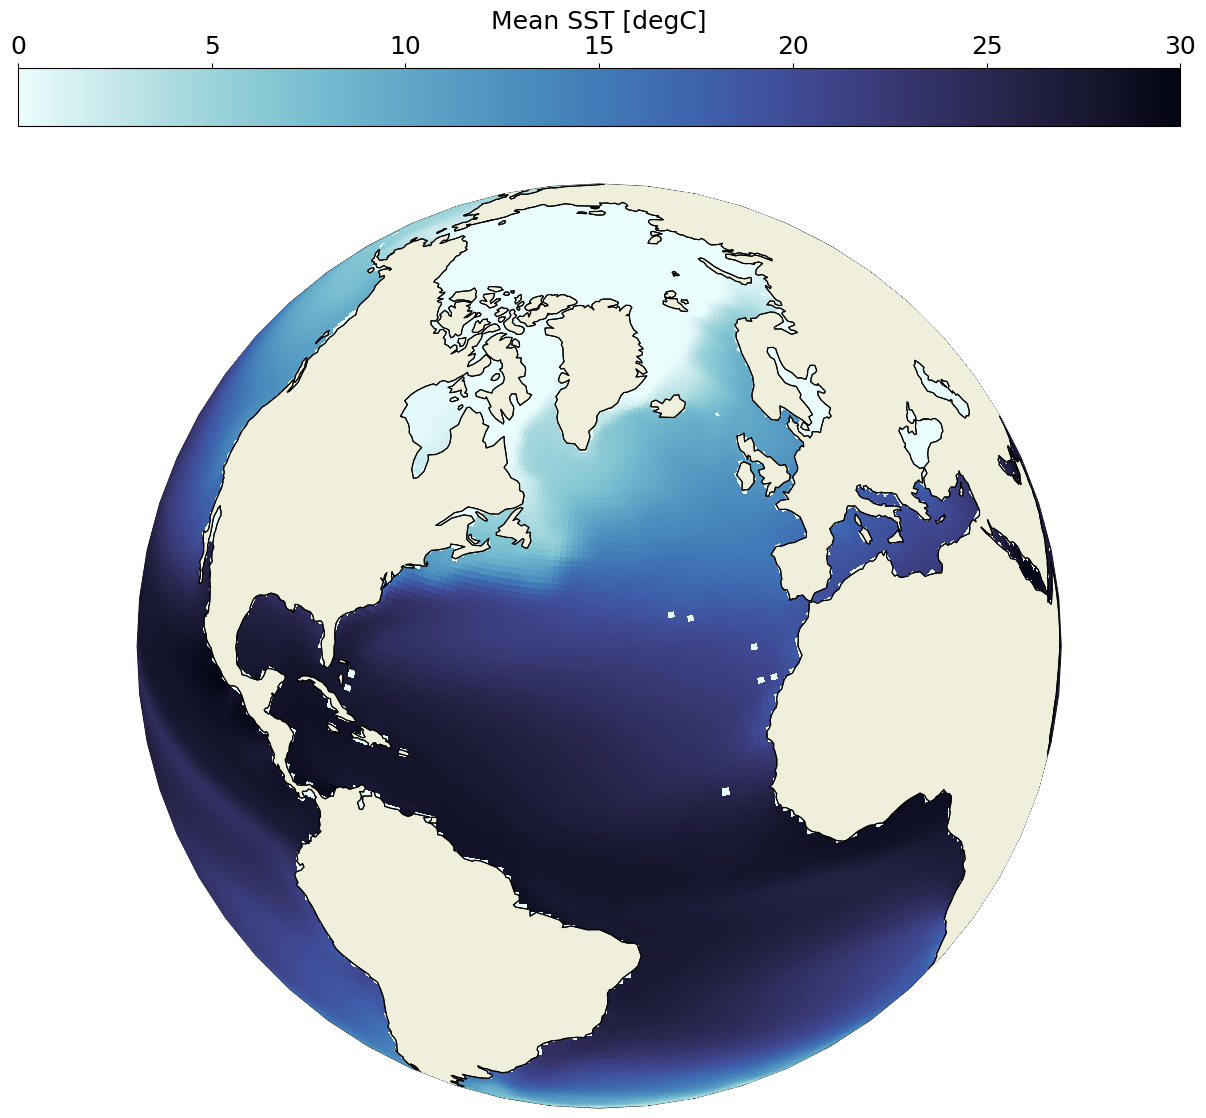

In [14]:
plt.figure(figsize=(15,15))
ecco.plot_proj_to_latlon_grid(dsm.XC,dsm.YC,sst,
                              show_colorbar=True, cmap=cm.ice_r, 
                              colorbar_label=f'Mean SST [{dsm.THETA.attrs["units"]}]',
                              colorbar_location='top',
                              projection_type='ortho',
                              cmin=0,cmax=30,
                              user_lon_0=-40,
                              user_lat_0=35 );

#plt.savefig('eccov4r4-SST-ortho.png', bbox_inches="tight")

# CSEM dissertation visuals

showing some results from ECCO state estimations to motivate the ppurpose of state estimation.

- 1992 year mean of THETA
- 2017 year mean of THETA
- time series of THETA mean at various depths

Using ECCOv4r4 *daily* results. So each plot takes ~45 mins to generate. I will try to load the smaller `DataArray`s to memory to avoid lengthy wait times. *DO NOT* load the massive `DataArray` to memory.

In [15]:
z=19

# T1992avg = ds.THETA.sel(time='1992').isel(k=z).mean('time')
# T2017avg = ds.THETA.sel(time='2017').isel(k=z).mean('time')

T1992avgm = dsm.THETA.sel(time='1992').isel(k=z).mean('time')
T2017avgm = dsm.THETA.sel(time='2017').isel(k=z).mean('time')

display(T1992avgm)

<xarray.DataArray 'THETA' (tile: 13, j: 90, i: 90)>
dask.array<mean_agg-aggregate, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates: (12/15)
    k        int64 19
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    XC       (tile, j, i) float32 -111.6 -111.3 -110.9 ... -99.42 -105.6 -111.9
    YC       (tile, j, i) float32 -88.24 -88.38 -88.52 ... -88.03 -88.08 -88.1
    ...       ...
    Depth    (tile, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    rA       (tile, j, i) float32 3.623e+08 3.633e+08 ... 3.685e+08 3.611e+08
    PHrefC   float32 2.942e+03
    drF      float32 46.5
    hFacC    (tile, j, i) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    maskC    (tile, j, i) bool False False False False ... False False False

In [17]:
def plotYearMean(da):
    ecco.plot_proj_to_latlon_grid(da.XC,da.YC,da,
                              show_colorbar=True, cmap=cm.ice_r, 
                              colorbar_location='right',
                              cmin=0,cmax=20) #,
                              # colorbar_label=f'Temperature at z={np.round(da.Z.values)} m [degC]' )
    return None

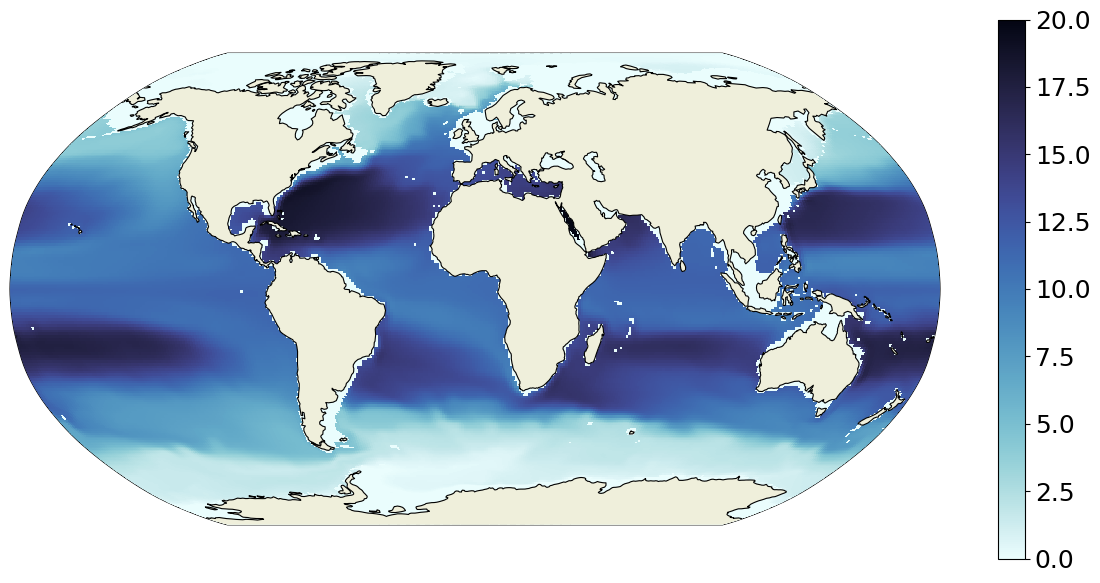

In [18]:
plotYearMean(T1992avgm)
# plt.savefig('/home/ivana/regionalgcm/img/csem_THETA_1992m.png', 
#             transparent=True, bbox_inches='tight', dpi=300)

plt.show()

In [32]:
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land_alt1'])

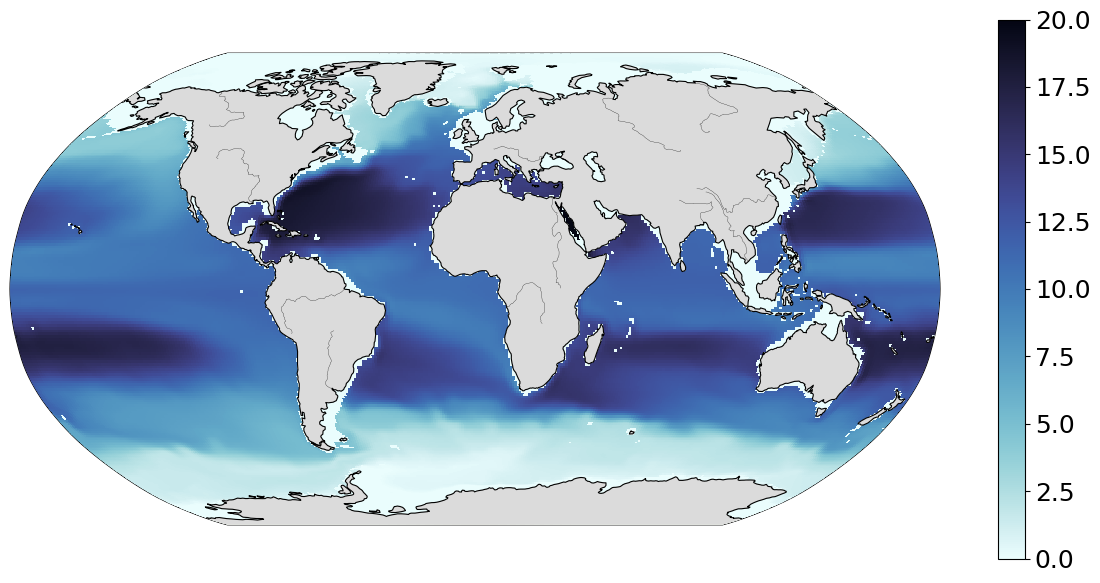

In [41]:
eccoObj = ecco.plot_proj_to_latlon_grid(T1992avgm.XC,T1992avgm.YC,T1992avgm,
                          show_colorbar=True, cmap=cm.ice_r, 
                          colorbar_location='right',
                          cmin=0,cmax=20) #,
                          # colorbar_label=f'Temperature at z={np.round(da.Z.values)} m [degC]' )
    
eccoObj[1].add_feature(cfeature.LAND, facecolor=cfeature.COLORS['land_alt1'], zorder=80)
eccoObj[1].add_feature(cfeature.RIVERS, edgecolor='k', linewidth=0.2, zorder=81)

plt.show()

<GeoAxesSubplot: >

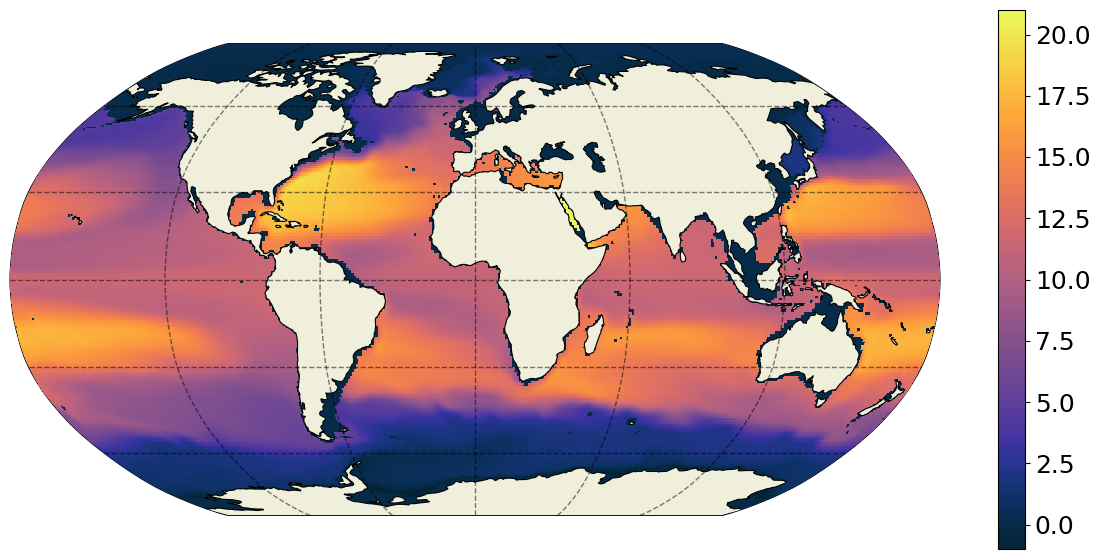

In [17]:
plotYearMean(T2017avgm)
# plt.savefig('/home/ivana/regionalgcm/img/csem_THETA_2017m.png', 
#             transparent=True, bbox_inches='tight', dpi=300)
plt.show()

In [18]:
da = T2017avgm - T1992avgm
# CMAP 0 center
min_val = da.min().values
max_val = da.max().values
max_extreme = max(abs(min_val), abs(max_val))
zero_midpoint = (0 - min_val) / (max_val - min_val)
print(zero_midpoint)

# Adjusted function to create the shifted colormap
def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    import matplotlib
    
    cdict = {'red': [], 'green': [], 'blue': [], 'alpha': []}
    reg_index = np.linspace(start, stop, 257)
    shift_index = np.hstack([np.linspace(0.0, midpoint, 128, endpoint=False), 
                             np.linspace(midpoint, 1.0, 129, endpoint=True)])
    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)
        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))
    new_cmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=new_cmap)
    return new_cmap

0.6149951010327857


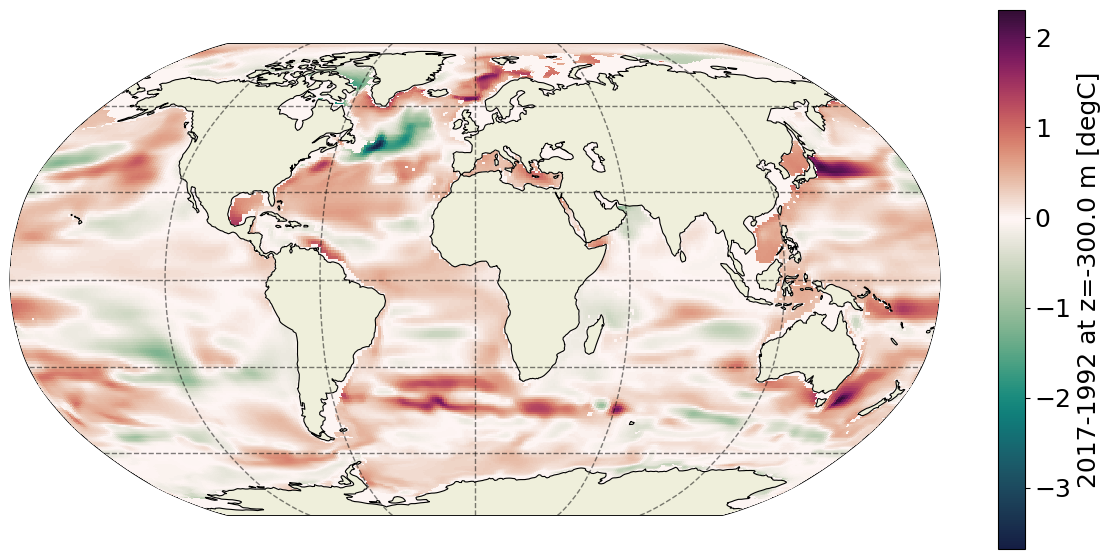

In [19]:
shifted_cmap = shiftedColorMap(cmo.curl, midpoint=zero_midpoint, name='shifted_curl')

plt.figure()
ecco.plot_proj_to_latlon_grid(da.XC,da.YC,da,
                          show_colorbar=True, cmap=shifted_cmap, 
                          colorbar_location='right',
                          colorbar_label=f'2017-1992 at z={np.round(da.Z.values)} m [degC]' )

# plt.savefig('/home/ivana/regionalgcm/img/csem_THETA_2017m-2002m.png', 
#             transparent=True, bbox_inches='tight', dpi=300)
plt.show()

The differences from 1992 to 2017 can be quantified. Here we find the number of grid points at z=300 m depth that are ocean versus land, `ocean_size`. Then, we determine the percent of the ocean that has warmed, cooled, or stayed constant for this specific depth. 

In [20]:
# Flip maskC at k=19 so 1 is land and zero is water
flipped_maskC = xr.where(dgrid.maskC.isel(k=z) == 0, 1, xr.where(dgrid.maskC.isel(k=z) == 1, 0, dgrid.maskC.isel(k=z)))

# remove land points from global number of points
ocean_size = da.size - flipped_maskC.sum()

# determine percent coverage of postive and negative changes
da_pos = da > 0
da_neg = da < 0
warmed = (da_pos.sum() / ocean_size).values
cooled = (da_neg.sum() / ocean_size).values

# display percentages
print( 'At z = -300 meters we see the following percent changes:\n',
       '\nwarmed: ', warmed, 
       '\ncooled: ', cooled,
       '\nunchanged: ', 1-warmed-cooled )

At z = -300 meters we see the following percent changes:
 
warmed:  0.6486020084081437 
cooled:  0.3513979915918562 
unchanged:  5.551115123125783e-17


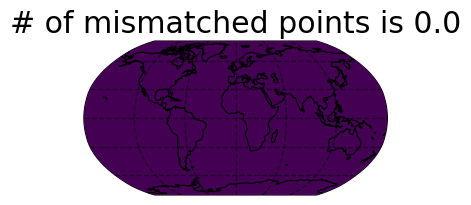

In [22]:
maskCcheck = flipped_maskC.astype(np.float) - (da==0).astype(np.float)

plt.figure(figsize=(5,2))
ecco.plot_proj_to_latlon_grid(dgrid.XC,dgrid.YC,maskCcheck,
                          show_land=False)
plt.title( f'# of mismatched points is {maskCcheck.sum().values}' )
plt.show()

#### Global mean time series
picked 4 depth levels and will plot time series 

In [23]:
# Global mean of THETA
Tgloavg = ds.THETA.mean(dim=['i','j','tile'])#.compute()
Tgloavgm = dsm.THETA.mean(dim=['i','j','tile'])#.compute()

In [24]:
MYz = Tgloavgm.Z.values
klist=[1,5,10,19]

In [38]:
Tgloavgm.time[0].values

numpy.datetime64('1992-01-16T12:00:00.000000000')

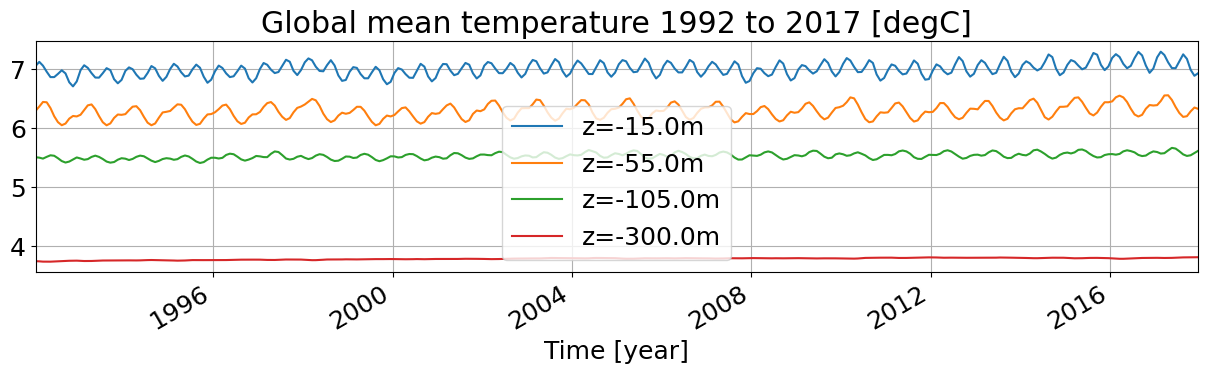

In [41]:
plt.figure(figsize=(15,3))

for k in klist:
    Tgloavgm.sel(k=k).plot(x='time', label=f'z={np.round(Tgloavgm.Z.sel(k=k).values)}m')
    
# text on plot
plt.title('Global mean temperature 1992 to 2017 [degC]')
plt.xlabel('Time [year]')
# plt.ylabel(f'Temperature [{dsm.THETA.attrs["units"]}]')
plt.ylabel('')
plt.legend(loc='lower center')

plt.xlim(Tgloavgm.time[0].values, Tgloavgm.time[-1].values)

plt.grid()

# Show the plot
plt.savefig('/home/ivana/regionalgcm/img/csem_ecco_THETA_time-series.png', 
            transparent=True, bbox_inches='tight', dpi=300)
plt.show()

### ECCOv4r4 daily versus monthly means

Looking at this one graph of global mean temperatures, it doesn't appear to have any difference in a year span plot. 

Therefore, use the monthly mean data, it's WAYYY faster to work with.

In [22]:
Tgloavg = ds.THETA.mean(dim=['i','j','tile'])#.compute()

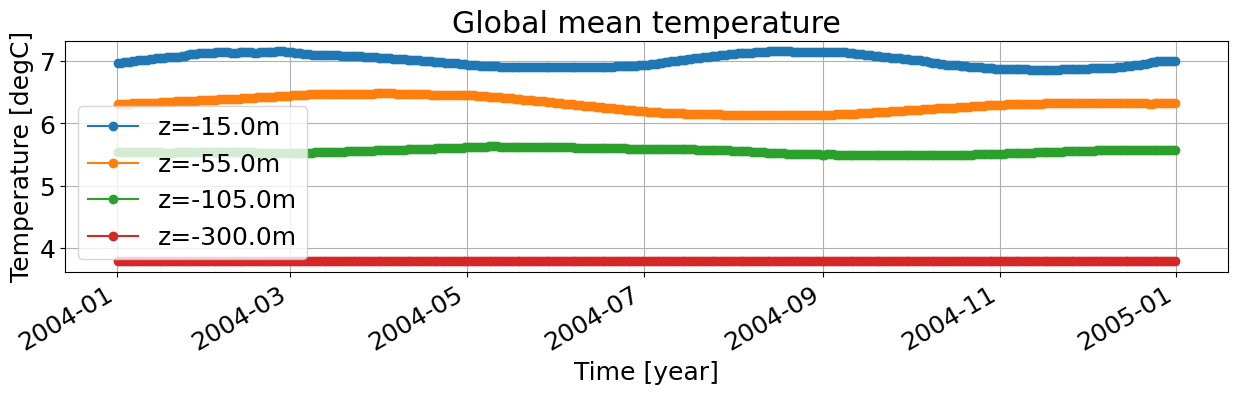

In [23]:
plt.figure(figsize=(15,3))

for k in klist:
    Tgloavg.sel(k=k).plot(x='time', marker='o', label=f'z={np.round(Tgloavgm.Z.sel(k=k).values)}m')
    
# text on plot
plt.title('Global mean temperature')
plt.xlabel('Time [year]')
plt.ylabel(f'Temperature [{dsm.THETA.attrs["units"]}]')
plt.legend()

plt.grid()

# Show the plot
plt.show()

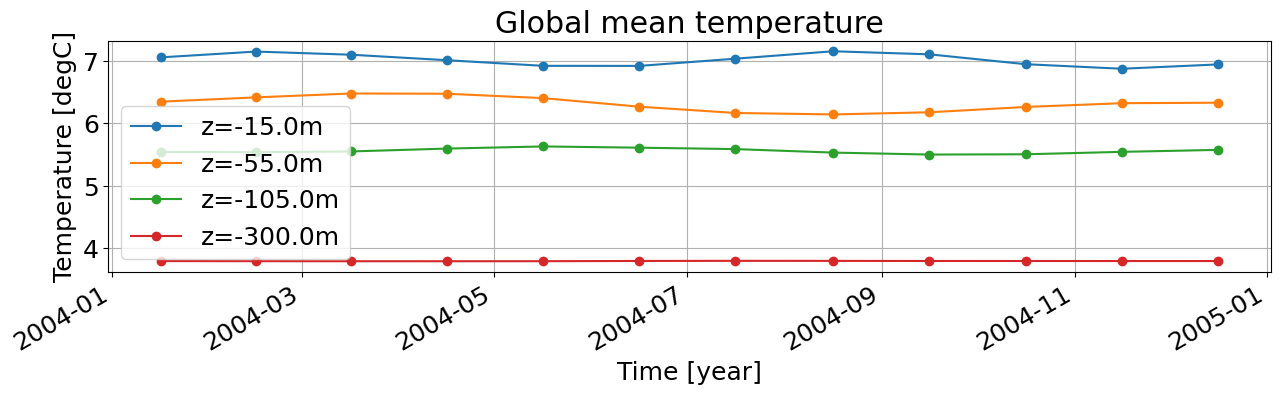

In [24]:
plt.figure(figsize=(15,3))

for k in klist:
    Tgloavgm.sel(k=k, time='2004').plot(x='time', marker='o', label=f'z={np.round(Tgloavgm.Z.sel(k=k).values)}m')
    
# text on plot
plt.title('Global mean temperature')
plt.xlabel('Time [year]')
plt.ylabel(f'Temperature [{dsm.THETA.attrs["units"]}]')
plt.legend()

plt.grid()

# Show the plot
plt.show()

<sub> Updated by Escobar, I. March 2024 </sub>